In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


#sns.set(rc = {figure.figsize : (15:12)})
#sns.set_style('darkgrid')

In [15]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15,12)})

In [2]:
data = pd.read_csv('E:/1Top Mentor/datasets/Uber_raw_2019.csv')
data

,Date/Time,Lat,Lon,Base
0,09-01-2019 00:01,40.2201,-74.0021,B02512
1,09-01-2019 00:01,40.7500,-74.0027,B02512
2,09-01-2019 00:03,40.7559,-73.9864,B02512
3,09-01-2019 00:06,40.7450,-73.9889,B02512
4,09-01-2019 00:11,40.8145,-73.9444,B02512
...,...,...,...,...
409560,09-12-2019 23:59,40.7558,-73.9172,B02764
409561,09-12-2019 23:59,40.7487,-73.9930,B02764
409562,09-12-2019 23:59,40.7253,-73.9955,B02764
409563,09-12-2019 23:59,40.7228,-73.9853,B02764


In [3]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [4]:
data.shape

(409565, 4)

In [5]:
data.describe(include = 'all')

,Date/Time,Lat,Lon,Base
count,409565,409565.000000,409565.000000,409565
unique,17171,NaN,NaN,5
top,09-04-2019 18:49,NaN,NaN,B02617
freq,74,NaN,NaN,158130
mean,NaN,40.739332,-73.971816,NaN
std,NaN,0.040368,0.058811,NaN
min,NaN,40.097200,-74.712100,NaN
25%,NaN,40.720900,-73.996500,NaN
50%,NaN,40.742100,-73.983300,NaN
75%,NaN,40.761000,-73.963800,NaN


In [6]:
data['Date/Time'] = pd.to_datetime(data['Date/Time']) # also we can do same using map

In [7]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime) ## same but little faster

In [8]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [10]:
# Extract day, Weekday, Hour

In [9]:
start = time.time()
data['Day'] = data['Date/Time'].dt.day()
data['WeekDay'] = data['Date/Time'].dt.weekday()
data['Hour'] = data['Date/Time'].dt.hour()
end = time.time()
print('The total time taken -', (end -start))

TypeError: 'Series' object is not callable

In [9]:
start = time.time()
data['Day'] = data['Date/Time'].apply(lambda x : x.day)
data['WeekDay'] = data['Date/Time'].apply(lambda x : x.weekday()) # Week day () was missing 
data['Hour'] = data['Date/Time'].apply(lambda x : x.hour)
end = time.time()
print('The total time taken -', (end -start))

The total time taken - 3.8459815979003906


In [10]:
data.head()

,Date/Time,Lat,Lon,Base,Day,WeekDay,Hour
0,2019-09-01 00:01:00,40.2201,-74.0021,B02512,1,6,0
1,2019-09-01 00:01:00,40.7500,-74.0027,B02512,1,6,0
2,2019-09-01 00:03:00,40.7559,-73.9864,B02512,1,6,0
3,2019-09-01 00:06:00,40.7450,-73.9889,B02512,1,6,0
4,2019-09-01 00:11:00,40.8145,-73.9444,B02512,1,6,0


In [ ]:
#perform simple data analysis using seaborn

E:\soft installed\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

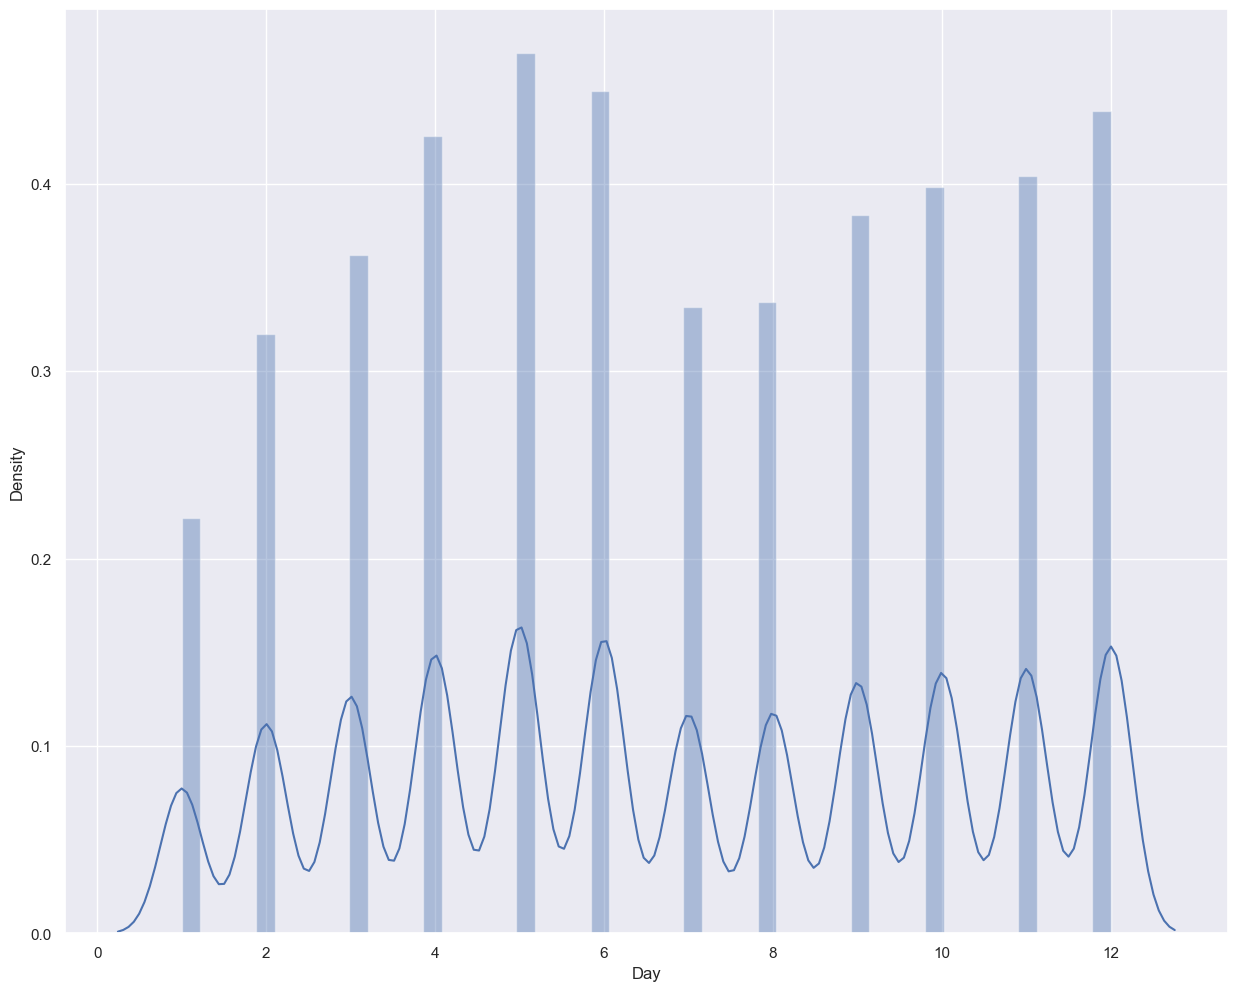

In [16]:
sns.distplot(data['Day']) # to check which day is high

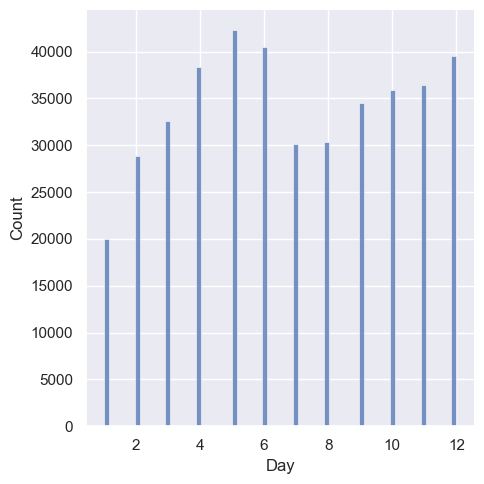

In [17]:
sns.displot(data['Day']) # to remove waveform

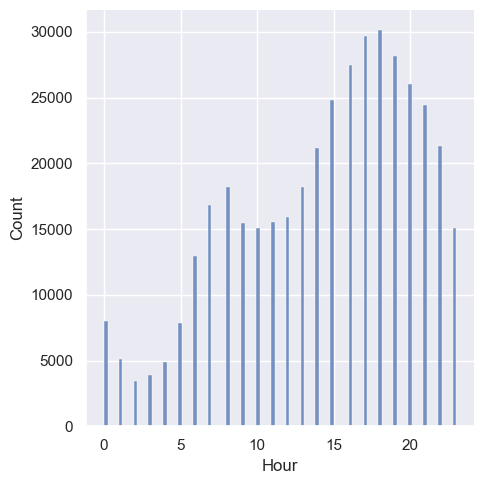

In [18]:
sns.displot(data['Hour']) # to check which hour is high

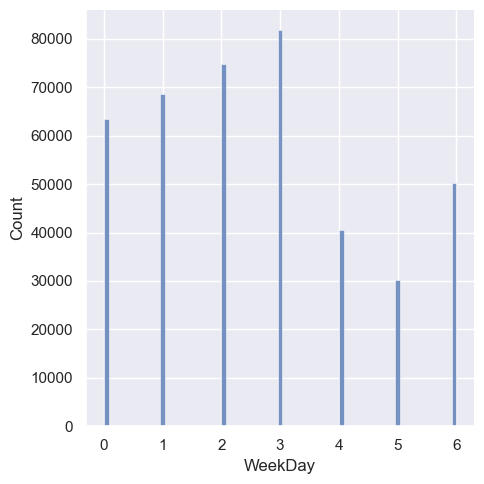

In [19]:
sns.displot(data['WeekDay']) # to check which weekday is high

In [21]:
sns.set(rc = {'figure.figsize' : (15:12)})
sns.set_style('darkgrid')
#sns.scatterplot(x = 'Lat', y='Lon', data=data)


SyntaxError: invalid syntax (1010010470.py, line 1)

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

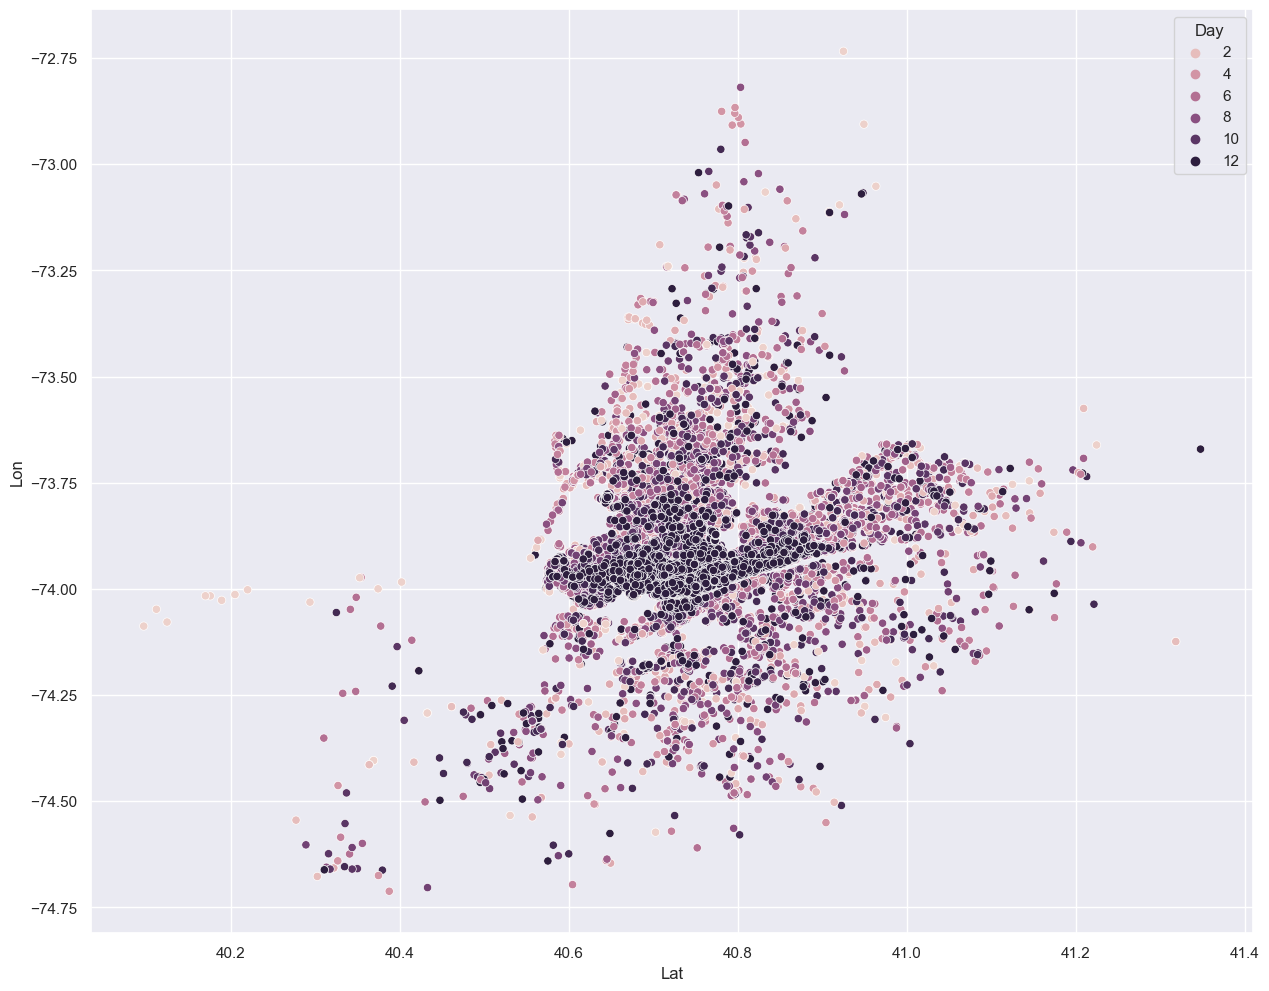

In [20]:
sns.scatterplot(x = 'Lat', y='Lon', data=data, hue = 'Day')

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

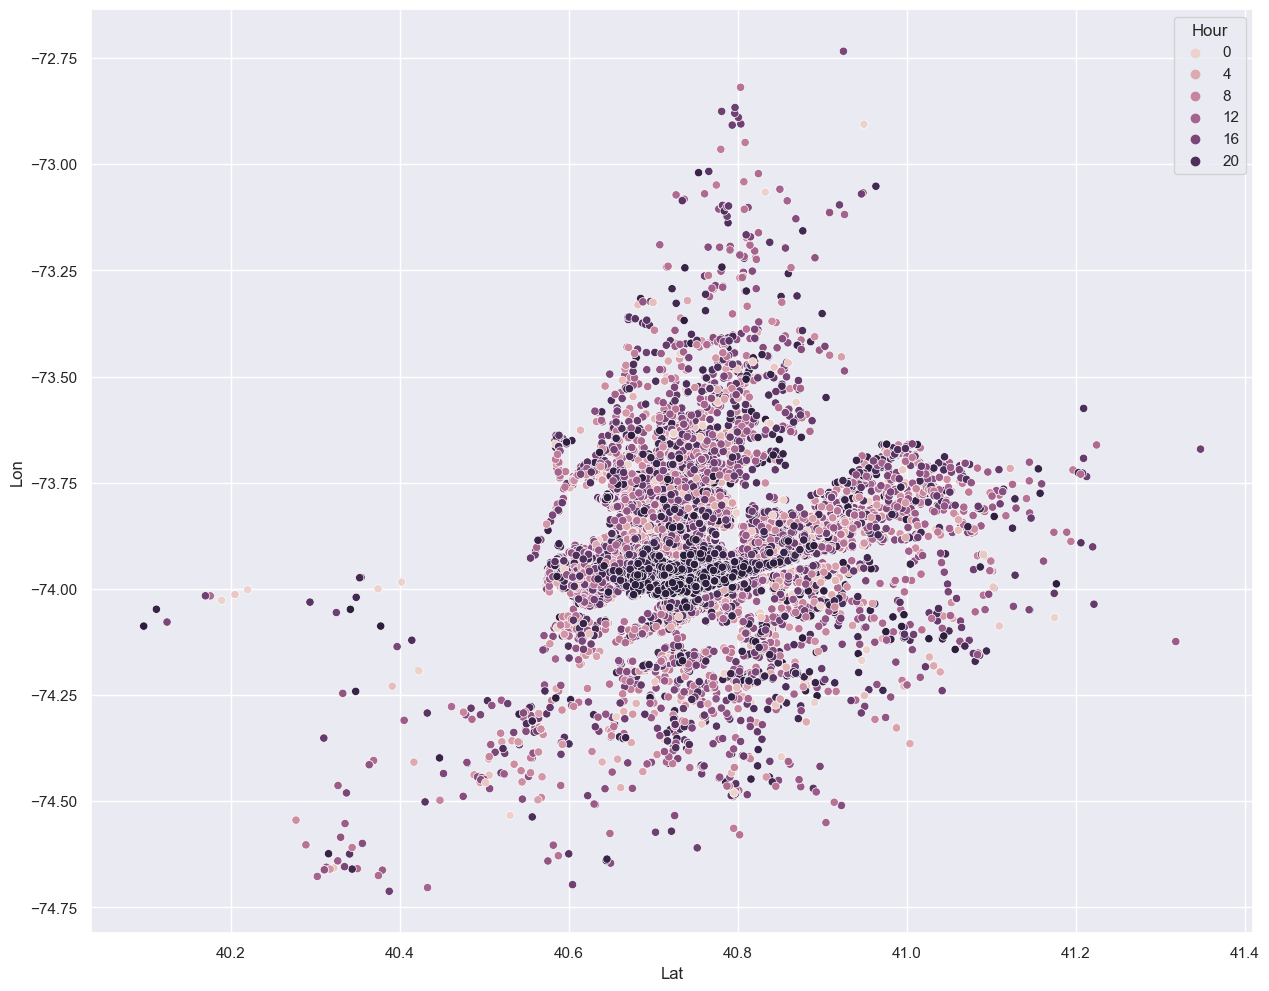

In [22]:
sns.scatterplot(x = 'Lat', y='Lon', data=data, hue = 'Hour')

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

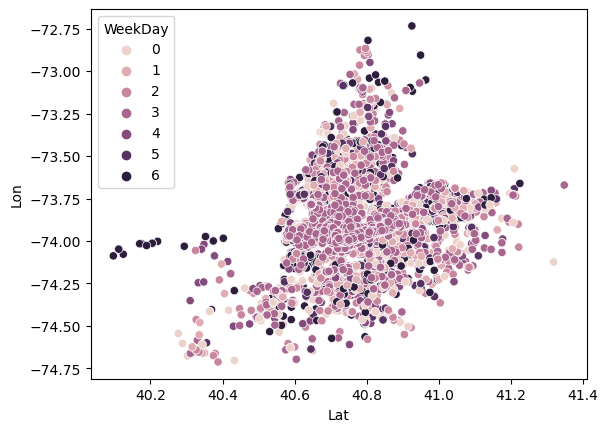

In [35]:
sns.scatterplot(x = 'Lat', y='Lon', data=data, hue = 'WeekDay')

In [23]:
data.Hour.unique

<bound method Series.unique of 0          0
1          0
2          0
3          0
4          0
          ..
409560    23
409561    23
409562    23
409563    23
409564    23
Name: Hour, Length: 409565, dtype: int64>

In [24]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [40]:
bins = [0,7,12,18,23]
data['Hour_cat'] = pd.cut(data['Hour'],bins =bins, labels =['0-6','7-11','12-17','18-21','22 & above'])

ValueError: Bin labels must be one fewer than the number of bin edges

In [25]:
# other than we can do by group by
a = data.groupby(['WeekDay','Hour']).size().reset_index()

In [26]:
a

,WeekDay,Hour,0
0,0,0,521
1,0,1,305
2,0,2,230
3,0,3,535
4,0,4,925
...,...,...,...
163,6,19,3222
164,6,20,3004
165,6,21,2542
166,6,22,1935


In [27]:
a.rename(columns= {0:'Trips'}, inplace =True)

In [ ]:
# we can findout the correlation between above two

In [28]:
a.corr

<bound method DataFrame.corr of      WeekDay  Hour  Trips
0          0     0    521
1          0     1    305
2          0     2    230
3          0     3    535
4          0     4    925
..       ...   ...    ...
163        6    19   3222
164        6    20   3004
165        6    21   2542
166        6    22   1935
167        6    23   1098

[168 rows x 3 columns]>

In [47]:
a.corr()

,WeekDay,Hour,Trips
WeekDay,1.000000e+00,-3.054975e-18,-0.295255
Hour,-3.054975e-18,1.000000e+00,0.647632
Trips,-2.952554e-01,6.476319e-01,1.000000


<AxesSubplot:>

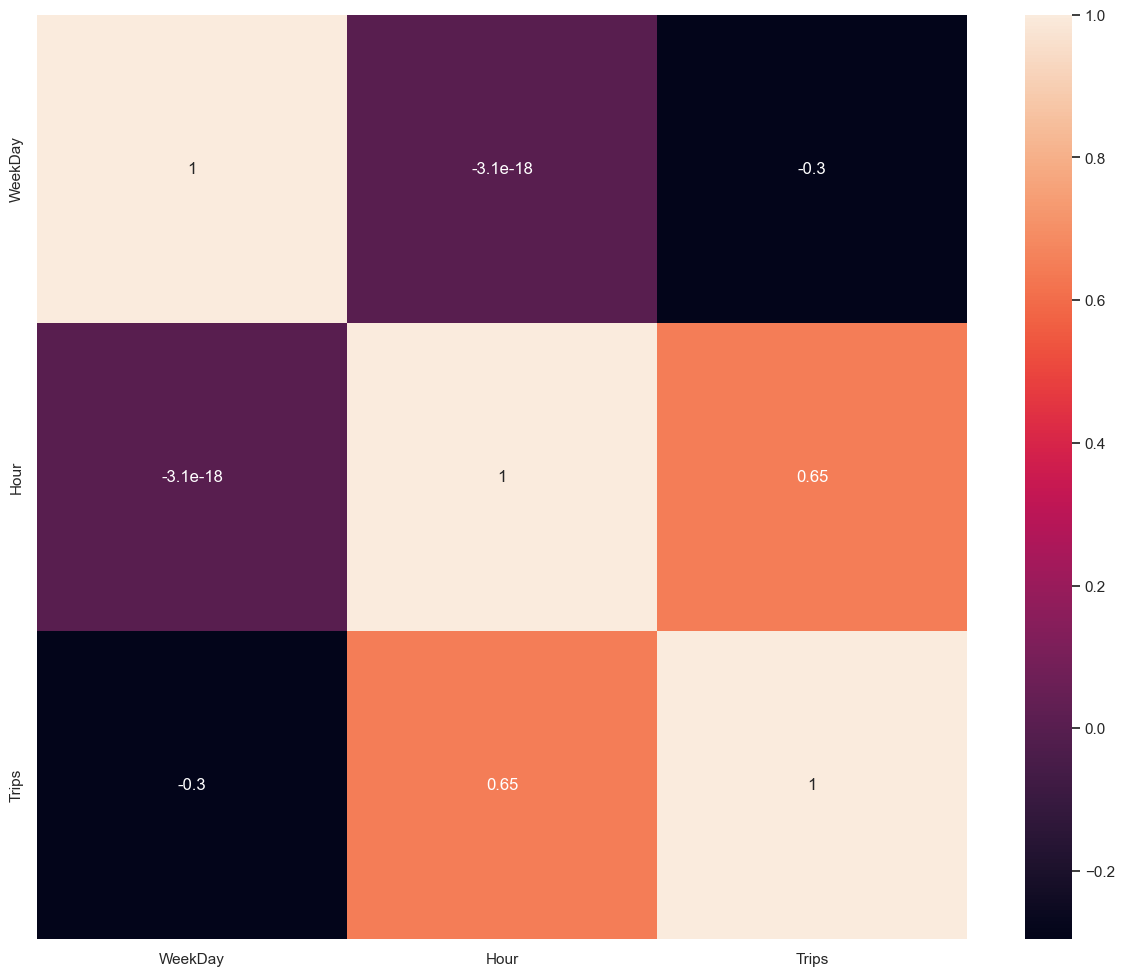

In [29]:
sns.heatmap(a.corr(),annot= True)

In [30]:
df = data.head(10)

In [31]:
# suppose if we want to extract day name
df['Day_name'] = pd.to_datetime(df['Date/Time']).dt.day_name()

C:\Users\user\AppData\Local\Temp\ipykernel_13008\3838916936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_name'] = pd.to_datetime(df['Date/Time']).dt.day_name()


In [32]:
df

,Date/Time,Lat,Lon,Base,Day,WeekDay,Hour,Day_name
0,2019-09-01 00:01:00,40.2201,-74.0021,B02512,1,6,0,Sunday
1,2019-09-01 00:01:00,40.7500,-74.0027,B02512,1,6,0,Sunday
2,2019-09-01 00:03:00,40.7559,-73.9864,B02512,1,6,0,Sunday
3,2019-09-01 00:06:00,40.7450,-73.9889,B02512,1,6,0,Sunday
4,2019-09-01 00:11:00,40.8145,-73.9444,B02512,1,6,0,Sunday
5,2019-09-01 00:12:00,40.6735,-73.9918,B02512,1,6,0,Sunday
6,2019-09-01 00:15:00,40.7471,-73.6472,B02512,1,6,0,Sunday
7,2019-09-01 00:16:00,40.6613,-74.2691,B02512,1,6,0,Sunday
8,2019-09-01 00:32:00,40.3745,-73.9999,B02512,1,6,0,Sunday
9,2019-09-01 00:33:00,40.7633,-73.9773,B02512,1,6,0,Sunday


# Simple linear Regression

In [57]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
data1 = sns.load_dataset('tips') # to practice only we took this data
data1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [61]:
data1.sample(frac=0.5)

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,Male,No,Sat,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2
127,14.52,2.00,Female,No,Thur,Lunch,2
6,8.77,2.00,Male,No,Sun,Dinner,2
35,24.06,3.60,Male,No,Sat,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
66,16.45,2.47,Female,No,Sat,Dinner,2
193,15.48,2.02,Male,Yes,Thur,Lunch,2
51,10.29,2.60,Female,No,Sun,Dinner,2


In [34]:
training = data1.sample(frac=0.8)
training

,total_bill,tip,sex,smoker,day,time,size
25,17.81,2.34,Male,No,Sat,Dinner,4
160,21.50,3.50,Male,No,Sun,Dinner,4
227,20.45,3.00,Male,No,Sat,Dinner,4
81,16.66,3.40,Male,No,Thur,Lunch,2
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
156,48.17,5.00,Male,No,Sun,Dinner,6
180,34.65,3.68,Male,Yes,Sun,Dinner,4
22,15.77,2.23,Female,No,Sat,Dinner,2
145,8.35,1.50,Female,No,Thur,Lunch,2


In [38]:
# another way of splitting data by library
from sklearn.model_selection import train_test_split # before splitting we have to tell what is x and y

In [49]:
x = data1[['total_bill','size']] # X is my independent variable
x.shape

(244, 2)

In [50]:
y = data1.tip
y.shape

(244,)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # creating four variables & how we want to separate (that y test_size=0.2)

In [52]:
x_train.shape, y_train.shape # 80% of my training data is splitted from original data

((195, 2), (195,))

In [65]:
y_train

191    4.19
158    2.61
60     3.21
229    2.88
179    3.55
       ... 
234    3.00
82     1.83
125    4.20
40     2.24
136    2.00
Name: tip, Length: 195, dtype: float64

In [53]:
x_test.shape, y_test.shape #20% of my test data is splitted from original data  

((49, 2), (49,))

In [60]:
x_test

,total_bill,size
54,25.56,4
241,22.67,2
173,31.85,2
108,18.24,2
156,48.17,6
46,22.23,2
222,8.58,1
205,16.47,3
235,10.07,2
202,13.00,2


In [59]:
y_test

54     4.34
241    2.00
173    3.18
108    3.76
156    5.00
46     5.00
222    1.92
205    3.23
235    1.25
202    2.00
34     3.27
3      3.31
219    3.09
174    4.00
212    9.00
217    1.50
64     2.64
25     2.34
70     1.97
121    1.68
139    2.75
20     4.08
61     2.00
195    1.44
209    2.23
17     3.71
55     3.51
69     2.09
74     2.20
11     5.00
15     3.92
2      3.50
4      3.61
224    1.58
214    6.50
37     3.07
225    2.50
102    2.50
199    2.00
192    2.56
180    3.68
137    2.00
96     4.00
116    5.07
162    2.00
88     5.85
231    3.00
133    2.00
187    2.00
Name: tip, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression() # this is for fitting the model (for training data only)

In [70]:
model_train = model.fit(x_train, y_train)
print ('Model Training is completed')
print ('The accurecy of the model training is', model_train.score(x_train,y_train)) # which means R^2

Model Training is completed
The accurecy of the model training is 0.4808257880817367


In [72]:
# onother way to check accurecy
model_train = model.fit(x_train, y_train)
print ('Model Training is completed')
acc = model_train.score(x_train,y_train)
print("The accuracy of the model training is ",round(acc,2))

Model Training is completed
The accuracy of the model training is  0.48


In [73]:
pred = model_train.predict(x_test) # the model which i have trained() and will get all my predicted tip

In [74]:
pred

array([3.88264329, 3.09230314, 3.90927679, 2.6980555 , 6.42796389,
       3.05314536, 1.5717919 , 2.80710681, 1.97096675, 2.23172196,
       2.65711782, 3.18218804, 4.29024017, 2.57168267, 5.90905834,
       2.10623907, 2.90678115, 3.19293241, 2.1445069 , 2.26909983,
       2.24596115, 2.66957712, 2.30380787, 1.74758942, 2.21036317,
       2.79108772, 2.80929919, 2.41060181, 2.38568322, 4.74589432,
       2.99529864, 3.21114389, 3.79631819, 2.26909983, 3.84834774,
       2.84804449, 2.52273545, 5.28383631, 2.27710938, 3.60580401,
       4.6916074 , 2.33406615, 3.50256986, 4.27155123, 2.78396812,
       3.27385284, 2.73769075, 2.16586569, 4.58529092])

In [75]:
residuals_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip': pred, 'Error': (y_test  -pred)})
residuals_df

,Actual Tip,Predicted Tip,Error
54,4.34,3.882643,0.457357
241,2.00,3.092303,-1.092303
173,3.18,3.909277,-0.729277
108,3.76,2.698056,1.061944
156,5.00,6.427964,-1.427964
46,5.00,3.053145,1.946855
222,1.92,1.571792,0.348208
205,3.23,2.807107,0.422893
235,1.25,1.970967,-0.720967
202,2.00,2.231722,-0.231722


In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
r2_score(y_test, pred)

0.4077154681135249

In [ ]:
# suppose we want to predict for 20,3 12,1 15,4

In [80]:
raw_test = pd.DataFrame({'total_bill':[20,12,15], 'size':[3,1,4]})
raw_test

,total_bill,size
0,20,3
1,12,1
2,15,4


In [82]:
pred = model_train.predict(raw_test)
pred

array([3.12125899, 1.87615463, 2.9428566 ])

In [83]:
df = pd.DataFrame({'Exp':[0,1,2,3,4,5], 'Salary':[2000,5000,10000,25000,30000,50000]})
df

,Exp,Salary
0,0,2000
1,1,5000
2,2,10000
3,3,25000
4,4,30000
5,5,50000


In [84]:
# now we have to convert vertical values into horizontal for that
x1 = df.iloc[:,0:1].values
x1

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [88]:
y1 = df.iloc[:,-1].values
y1

array([ 2000,  5000, 10000, 25000, 30000, 50000], dtype=int64)

In [89]:
model1 = LinearRegression()
model1.fit(x1,y1)

LinearRegression()

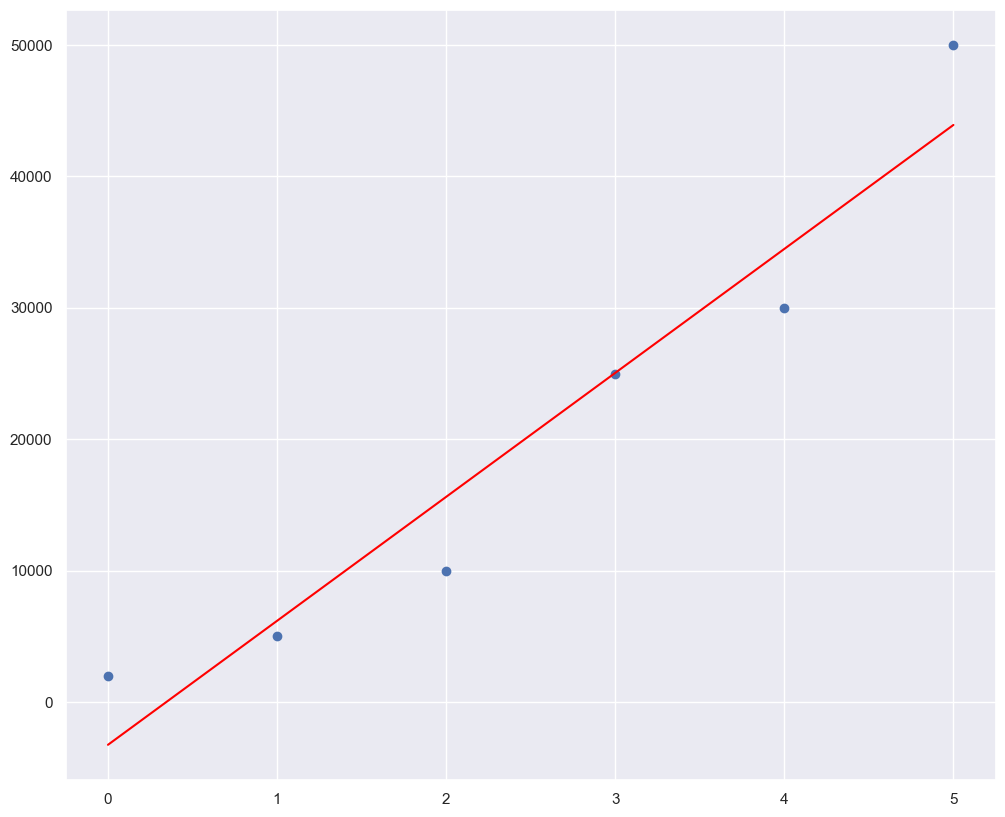

In [91]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,10)})
plt.scatter(x1,y1)
plt.plot(x1,model1.predict(x1),color = 'red')#this is to draw line

In [93]:
#plt.scatter(x1,y1)
#plt.plot(y1,model1.predict(y1),color = 'red')# it wont work like this

# Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
poly = PolynomialFeatures(degree= 6)

In [100]:
x_poly = poly.fit_transform(x1) # It take x1 and transform that square, cube power4 like this
x_poly

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03, 4.0960e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03, 1.5625e+04]])

In [101]:
model1.fit(x_poly,y1) # here instead of x1 we using x-poly

LinearRegression()

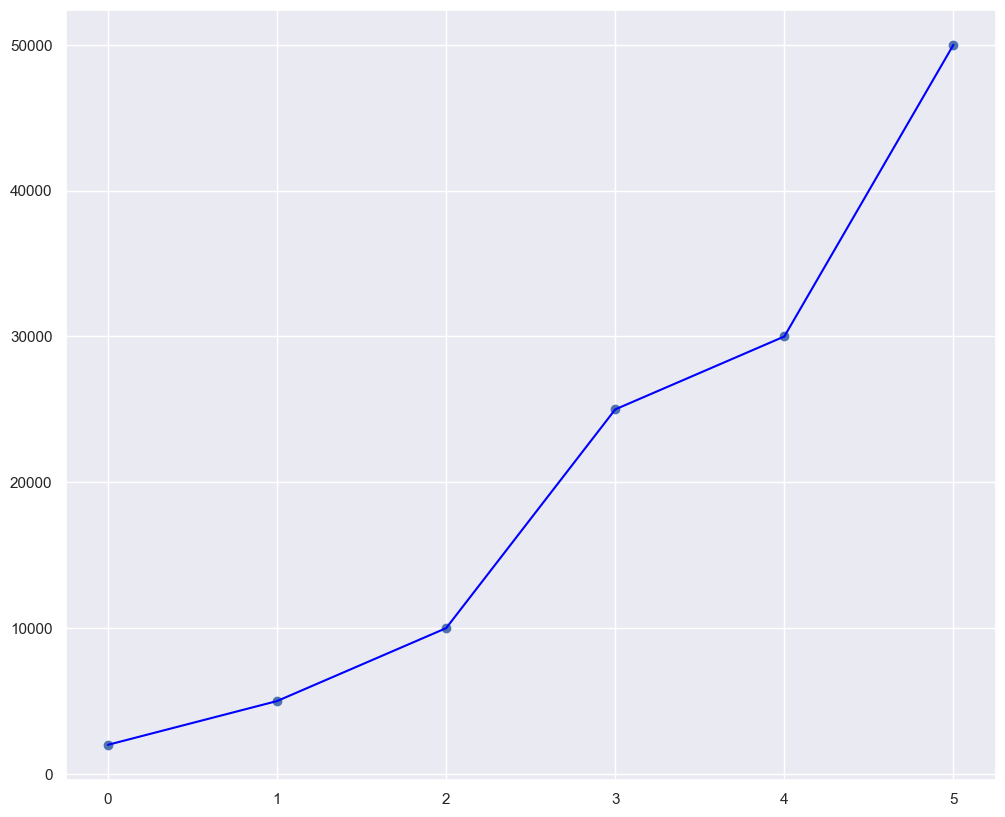

In [102]:
plt.scatter(x1,y1)
plt.plot(x1,model1.predict(x_poly),color = 'blue')